<h1>Importing Necessary Libraries</h1>

In [47]:


# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
import pickle
from os import path

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Import Keras and TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor  # Use scikeras wrapper instead of keras.wrappers

# Define the Keras model
def build_model():
    model = Sequential()
    model.add(Dense(64, input_dim=10, activation='relu'))  # Example architecture
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Example usage of KerasRegressor
model = KerasRegressor(model=build_model, epochs=10, batch_size=32)


<h1>Importing Walmart Store Sales Dataset</h1>

In [49]:
df = pd.read_csv('final data.csv')
df.head()

Date  Store  Dept  Weekly_Sales Type    Size  Temperature  \
0  05-02-2010      1     1      24924.50    A  151315        42.31   
1  05-02-2010      9    97        668.48    B  125833        38.01   
2  05-02-2010      9    85        693.87    B  125833        38.01   
3  05-02-2010      8    80       8654.60    A  155078        34.14   
4  05-02-2010      9    55      11123.56    B  125833        38.01   

   Fuel_Price         CPI  Unemployment  ...  Week       max       min  \
0       2.572  211.096358         8.106  ...     5  57592.12  14537.37   
1       2.572  214.655459         6.415  ...     5    766.93     -9.92   
2       2.572  214.655459         6.415  ...     5   2512.14    110.56   
3       2.572  214.471451         6.299  ...     5  11990.43   7414.43   
4       2.572  214.655459         6.415  ...     5  29166.26   4791.74   

           mean    median          std  Total_MarkDown  Google Clicks  \
0  22513.322940  18535.48  9854.349032             0.0           1630   
1    372.655556    371.05   290.954675             0.0           4479   
2    876.629441    824.04   307.436056             0.0           5120   
3   9188.915105   9161.97   756.223236             0.0           7939   
4   8607.050490   7571.60  3874.176095             0.0           7309   

   Facebook Impressions  Unnamed: 22  
0                 34551          NaN  
1                 40139          NaN  
2                 25209          NaN  
3                 29071          NaN  
4                  6364          NaN  

[5 rows x 23 columns]

<h1>Data Preprocessing</h1>

<Axes: >

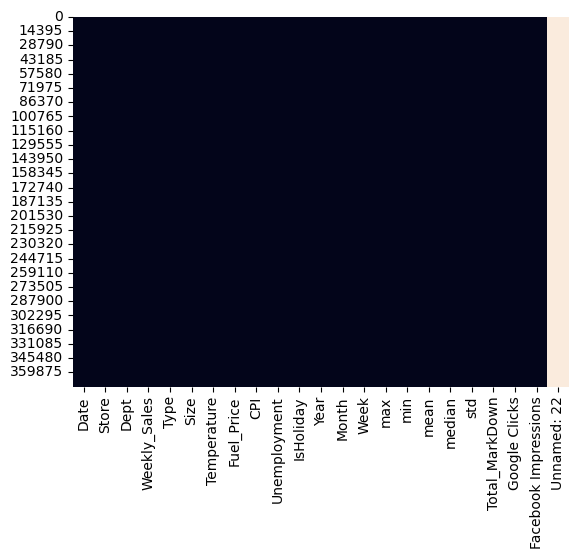

In [52]:
sns.heatmap(df.isnull(),cbar=False)

In [54]:
df.isnull().sum().sum()

374247

In [56]:
df=df.drop('Unnamed: 22',axis=1)
df

Date  Store  Dept  Weekly_Sales Type    Size  Temperature  \
0       05-02-2010      1     1      24924.50    A  151315        42.31   
1       05-02-2010      9    97        668.48    B  125833        38.01   
2       05-02-2010      9    85        693.87    B  125833        38.01   
3       05-02-2010      8    80       8654.60    A  155078        34.14   
4       05-02-2010      9    55      11123.56    B  125833        38.01   
...            ...    ...   ...           ...  ...     ...          ...   
374242  26-10-2012      2    26       9258.88    A  202307        69.79   
374243  26-10-2012     38    23         53.12    C   39690        65.95   
374244  26-10-2012     27     6       5339.65    A  204184        58.99   
374245  26-10-2012     36    40      10216.27    A   39910        74.39   
374246  26-10-2012     45    98       1076.80    B  118221        58.85   

        Fuel_Price         CPI  Unemployment  ...  Month  Week       max  \
0            2.572  211.096358         8.106  ...      2     5  57592.12   
1            2.572  214.655459         6.415  ...      2     5    766.93   
2            2.572  214.655459         6.415  ...      2     5   2512.14   
3            2.572  214.471451         6.299  ...      2     5  11990.43   
4            2.572  214.655459         6.415  ...      2     5  29166.26   
...            ...         ...           ...  ...    ...   ...       ...   
374242       3.506  223.078337         6.170  ...     10    43  19679.04   
374243       4.301  131.193097        10.199  ...     10    43    289.78   
374244       4.071  142.762411         8.000  ...     10    43  41005.33   
374245       3.494  222.113657         6.228  ...     10    43  13605.53   
374246       3.882  192.308899         8.667  ...     10    43   1504.71   

             min          mean     median          std  Total_MarkDown  \
0       14537.37  22513.322940  18535.480  9854.349032            0.00   
1          -9.92    372.655556    371.050   290.954675            0.00   
2         110.56    876.629441    824.040   307.436056            0.00   
3        7414.43   9188.915105   9161.970   756.223236            0.00   
4        4791.74   8607.050490   7571.600  3874.176095            0.00   
...          ...           ...        ...          ...             ...   
374242   4179.99   9347.725105   8762.990  2825.107609         9678.80   
374243      3.50     37.848679     31.365    34.065601          502.88   
374244   2524.01   7730.729091   6798.780  5178.928257        10969.27   
374245   8444.83  10541.569860  10329.180  1043.930131         1260.55   
374246      2.00    561.239037    619.410   371.286705         5247.26   

        Google Clicks  Facebook Impressions  
0                1630                 34551  
1                4479                 40139  
2                5120                 25209  
3                7939                 29071  
4                7309                  6364  
...               ...                   ...  
374242           3178                 13016  
374243           5273                 17709  
374244           9960                 32891  
374245           4797                 42981  
374246           2647                 48585  

[374247 rows x 22 columns]

<Axes: >

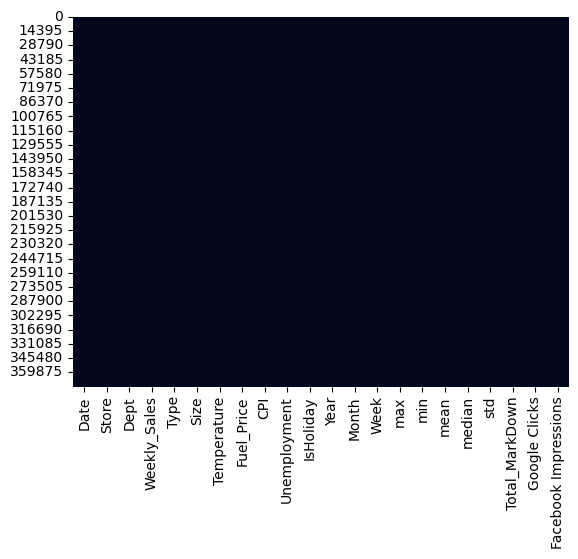

In [58]:
sns.heatmap(df.isnull(),cbar=False)

In [60]:
df.isnull().sum().sum()

0

In [62]:
df.tail()

Date  Store  Dept  Weekly_Sales Type    Size  Temperature  \
374242  26-10-2012      2    26       9258.88    A  202307        69.79   
374243  26-10-2012     38    23         53.12    C   39690        65.95   
374244  26-10-2012     27     6       5339.65    A  204184        58.99   
374245  26-10-2012     36    40      10216.27    A   39910        74.39   
374246  26-10-2012     45    98       1076.80    B  118221        58.85   

        Fuel_Price         CPI  Unemployment  ...  Month  Week       max  \
374242       3.506  223.078337         6.170  ...     10    43  19679.04   
374243       4.301  131.193097        10.199  ...     10    43    289.78   
374244       4.071  142.762411         8.000  ...     10    43  41005.33   
374245       3.494  222.113657         6.228  ...     10    43  13605.53   
374246       3.882  192.308899         8.667  ...     10    43   1504.71   

            min          mean     median          std  Total_MarkDown  \
374242  4179.99   9347.725105   8762.990  2825.107609         9678.80   
374243     3.50     37.848679     31.365    34.065601          502.88   
374244  2524.01   7730.729091   6798.780  5178.928257        10969.27   
374245  8444.83  10541.569860  10329.180  1043.930131         1260.55   
374246     2.00    561.239037    619.410   371.286705         5247.26   

        Google Clicks  Facebook Impressions  
374242           3178                 13016  
374243           5273                 17709  
374244           9960                 32891  
374245           4797                 42981  
374246           2647                 48585  

[5 rows x 22 columns]

In [64]:
df.shape

(374247, 22)

In [66]:
df.describe()

Store           Dept   Weekly_Sales           Size  \
count  374247.000000  374247.000000  374247.000000  374247.000000   
mean       22.299345      43.421369   13058.690149  134650.701571   
std        12.919329      30.087812   15417.195280   60805.893266   
min         1.000000       1.000000       0.000000   34875.000000   
25%        11.000000      18.000000    1979.800000   93188.000000   
50%        22.000000      36.000000    7101.310000  128107.000000   
75%        33.000000      72.000000   18252.355000  202307.000000   
max        45.000000      99.000000   72756.180000  219622.000000   

         Temperature     Fuel_Price            CPI   Unemployment  \
count  374247.000000  374247.000000  374247.000000  374247.000000   
mean       60.241022       3.354381     173.423324       7.695551   
std        18.112858       0.466553      38.918398       1.390530   
min        14.020000       2.472000     126.064000       3.879000   
25%        47.130000       2.891000     132.756800       6.858000   
50%        62.490000       3.462000     188.797935       7.838000   
75%        74.220000       3.738000     213.178695       8.512000   
max       100.140000       4.468000     227.232807      12.187000   

           IsHoliday           Year          Month           Week  \
count  374247.000000  374247.000000  374247.000000  374247.000000   
mean        0.063335    2010.968702       6.437807      25.788471   
std         0.243565       0.802722       3.180864      13.840661   
min         0.000000    2010.000000       1.000000       1.000000   
25%         0.000000    2010.000000       4.000000      14.000000   
50%         0.000000    2011.000000       6.000000      26.000000   
75%         0.000000    2012.000000       9.000000      37.000000   
max         1.000000    2012.000000      12.000000      52.000000   

                 max            min           mean         median  \
count  374247.000000  374247.000000  374247.000000  374247.000000   
mean    30520.909403    8428.549075   13346.242316   12562.757282   
std     42046.263020   11364.174300   15474.285934   15032.726407   
min         0.020000   -4988.940000    -116.454545    -143.000000   
25%      5794.330000     675.000000    2308.411818    2017.000000   
50%     17294.460000    3847.950000    7534.953916    6856.100000   
75%     41082.450000   11424.500000   18687.708250   17317.790000   
max    649770.180000   72028.740000  108598.364100  107690.800000   

                 std  Total_MarkDown  Google Clicks  Facebook Impressions  
count  374247.000000   374247.000000  374247.000000         374247.000000  
mean     3592.673175     4791.107820    5054.230001          25239.058929  
std      5243.661887     8782.758785    2858.472958          14277.744489  
min         0.000000        0.000000     100.000000            500.000000  
25%       731.571412        0.000000    2578.500000          12881.000000  
50%      1880.958217        0.000000    5060.000000          25193.000000  
75%      4263.309723     6893.330000    7532.000000          37604.500000  
max     71265.927070    43413.900000    9999.000000          49999.000000

<h1>EDA</h1>

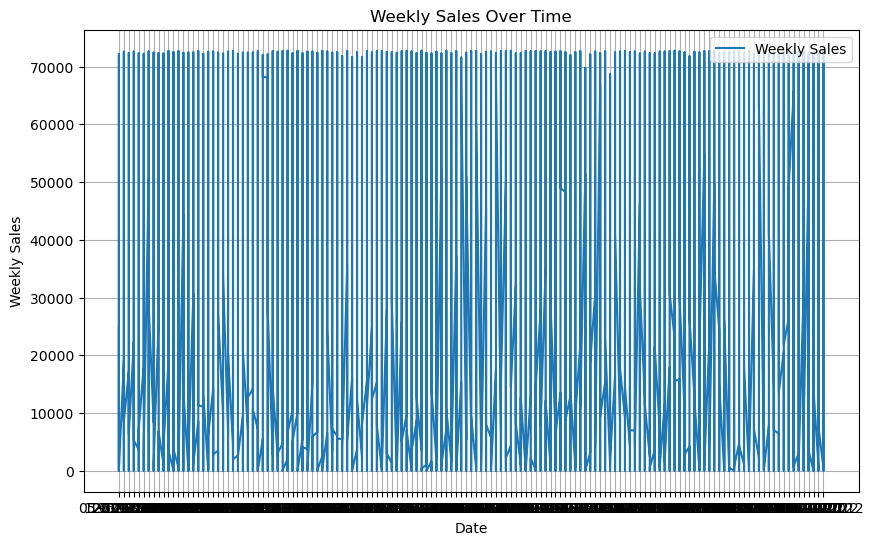

In [68]:
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Weekly_Sales'], label='Weekly Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()


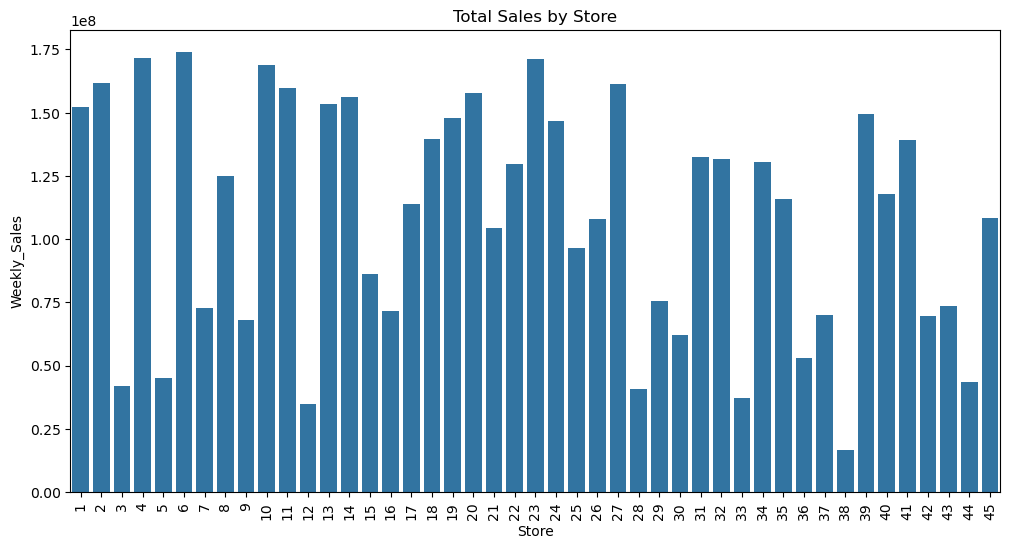

In [70]:
plt.figure(figsize=(12,6))
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales)
plt.title('Total Sales by Store')
plt.xticks(rotation=90)
plt.show()

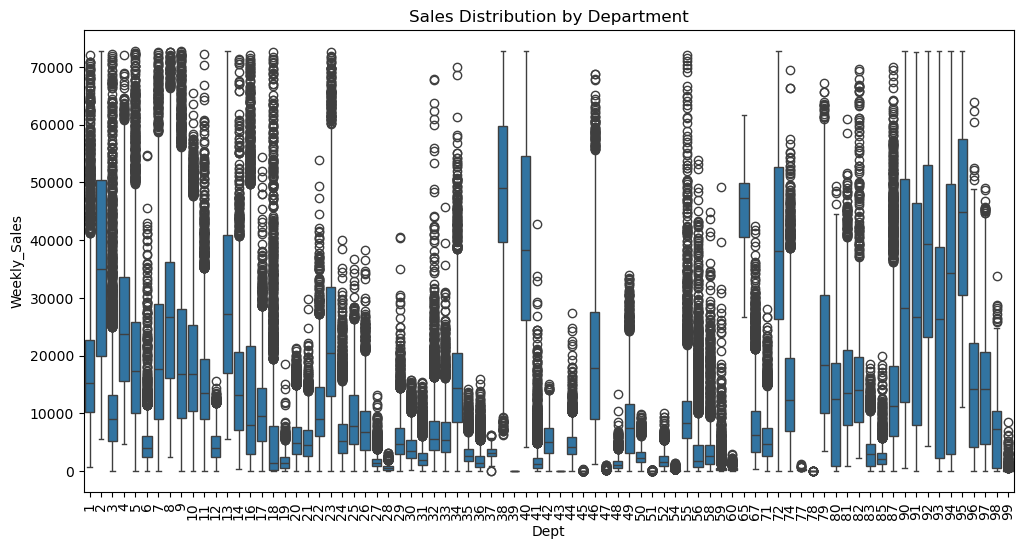

In [72]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Dept', y='Weekly_Sales', data=df)
plt.title('Sales Distribution by Department')
plt.xticks(rotation=90)
plt.show()


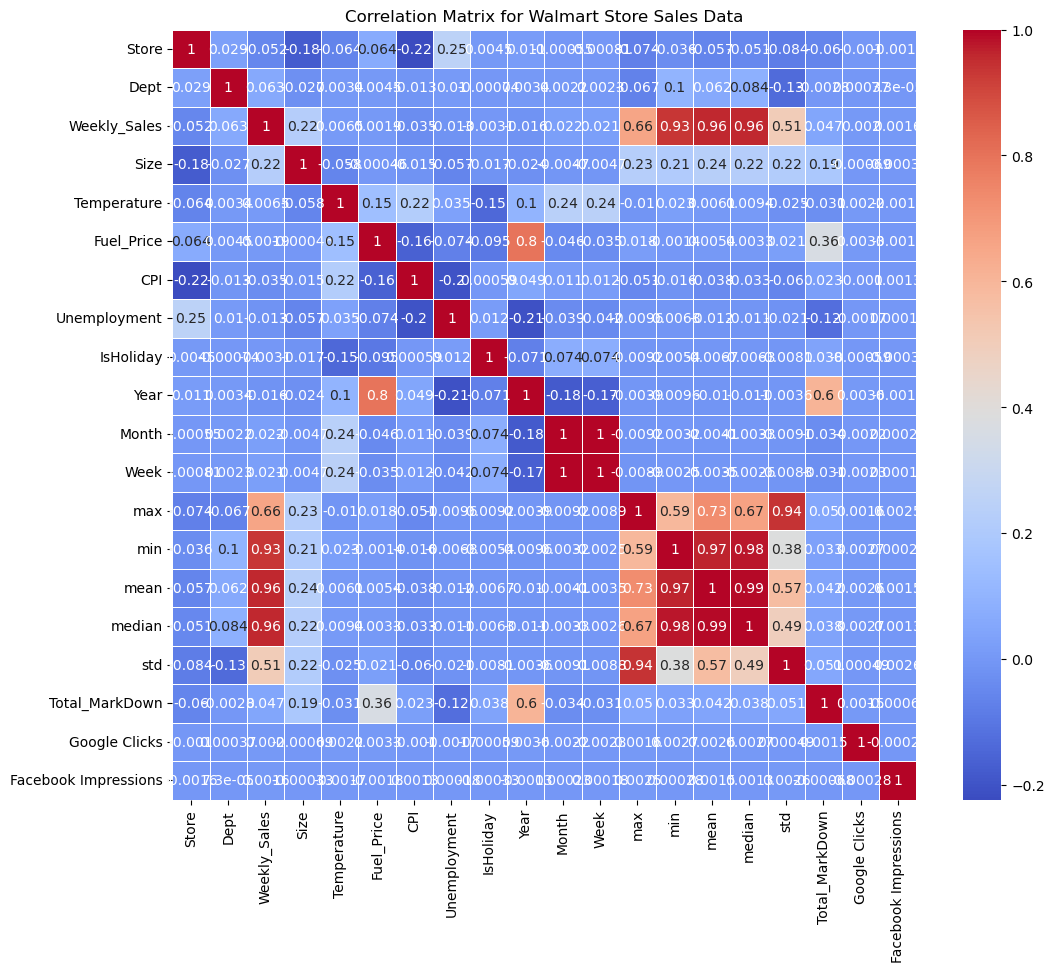

In [73]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Walmart Store Sales Data')
plt.show()

<h1>Linear Regression</h1>

In [76]:
X = df.drop(columns=['Weekly_Sales','Date','Type'])  # All columns except the target variable
y = df['Weekly_Sales'] 

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer

In [82]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [84]:
# Making predictions
y_pred = model.predict(X_test)
print("Predicted values:", y_pred)


Predicted values: [12935.09530138  4343.7720957    360.85163755 ...  1328.38693488
  8007.83737792 22404.79525776]


In [86]:
print("Actual values:", y_test)

Actual values: 317788    13381.89
38175      3557.00
158995      114.40
86564        52.65
11545      3043.38
            ...   
340171     6185.00
226196      184.80
256994     2860.00
33015      8065.17
210354    17541.80
Name: Weekly_Sales, Length: 74850, dtype: float64


In [88]:
print(list(zip(y_test, y_pred)))

[(13381.89, 12935.09530138108), (3557.0, 4343.772095702938), (114.4, 360.8516375507461), (52.65, 546.8025277728448), (3043.38, 3239.927068967838), (13535.78, 7727.311443031067), (26087.34, 25825.787543979823), (1617.98, 2694.478746847599), (31363.61, 30732.203030664125), (33950.58, 35467.085300721345), (12180.06, 13853.385111049865), (2220.0, 3307.9098498296225), (367.0, 1712.8863195407903), (272.53, 448.4351912905695), (4743.48, 3433.923721870291), (3618.76, 2062.1084609569516), (1560.0, 1440.2712068211986), (11715.26, 10028.316773458035), (6089.35, 5858.830972706899), (23451.16, 27512.361812810646), (27694.88, 32227.570986843144), (13326.63, 8781.517487112433), (1246.29, 1405.1707277124515), (46047.35, 32537.920591967995), (44998.39, 48591.30595664284), (16295.61, 16219.844144746661), (20369.2, 19938.72074030165), (19671.32, 11503.784796024906), (20710.2, 25721.16681467835), (2639.53, 2641.309166273335), (4700.05, 5271.0539229271235), (5697.4, 6123.6453022157075), (42.05, 587.0781280

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
mae = mean_absolute_error(y_test, y_pred)

# Output the results
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 17957496.782479327
Root Mean Squared Error: 4237.628674445099
Mean Absolute Error: 2168.9241556561374


In [92]:
# To check coefficients and intercept
print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)


Intercept:  554378.4648403442
Coefficients:  [ 2.11117870e+00 -2.76543282e+00  3.62042576e-04 -4.62410833e+00
  2.23823223e+02  7.84646963e-01 -1.50361435e+01 -1.12112827e+01
 -2.76285909e+02  7.29471605e+02 -1.40932952e+02 -3.36141938e-02
 -2.10663235e-02  1.02614129e+00  9.06074176e-03  5.66668336e-03
  2.63846514e-02 -2.56912589e-03  7.05640616e-04]


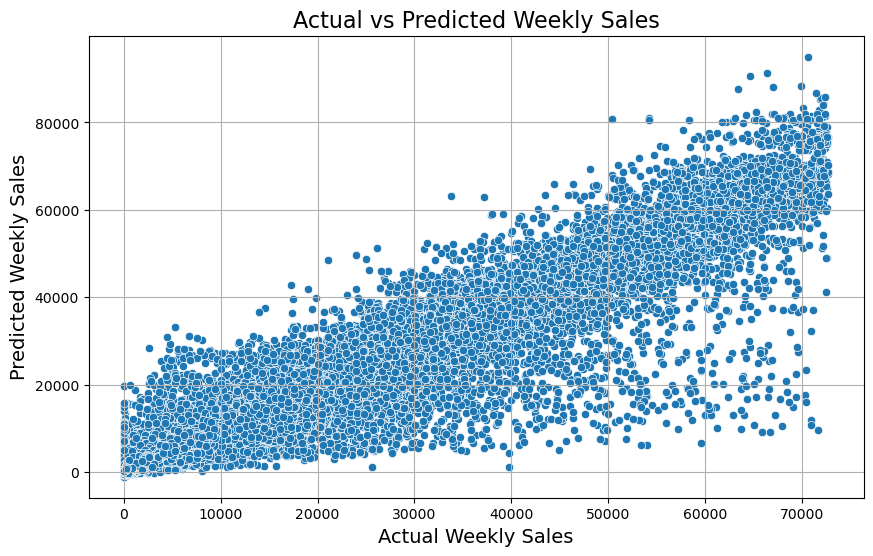

In [94]:
# Optional: Visualizing the predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Weekly Sales', fontsize=14)
plt.ylabel('Predicted Weekly Sales', fontsize=14)
plt.title('Actual vs Predicted Weekly Sales', fontsize=16)
plt.grid()
plt.show()

<h1>ARIMA</h1>

In [114]:
pip install pandas numpy matplotlib statsmodels scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [124]:
train_size = int(len(df) * 0.8)
train, test = df['Weekly_Sales'][0:train_size], df['Weekly_Sales'][train_size:]

In [125]:
model = ARIMA(train, order=(5, 1, 0)) 
model_fit = model.fit()
print(model_fit)

In [130]:
predictions = model_fit.forecast(steps=len(test))
test.index = test.index[:len(predictions)]  

In [131]:
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, predictions)

In [134]:
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Mean Squared Error (MSE): 251357574.67
Root Mean Squared Error (RMSE): 15854.26
Mean Absolute Error (MAE): 10919.65


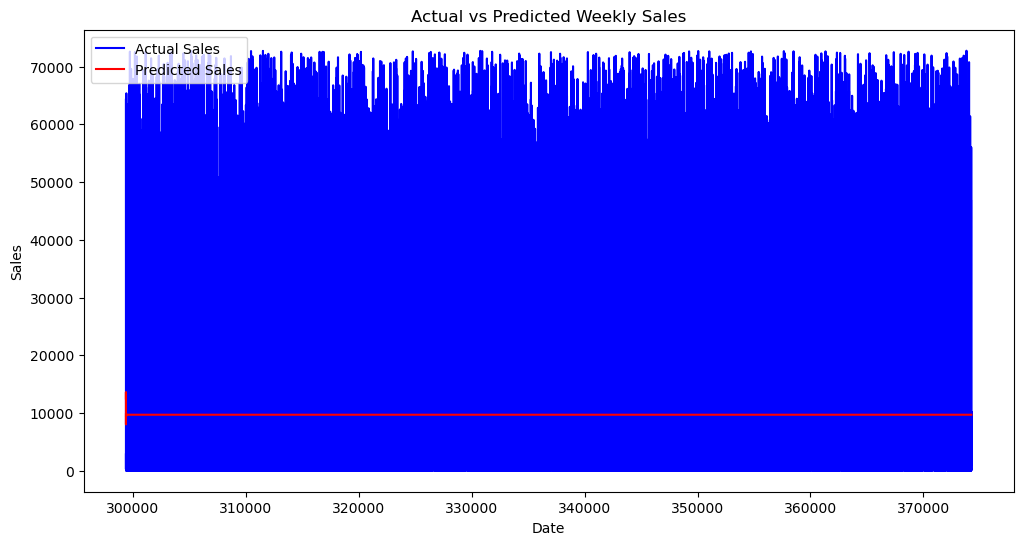

In [152]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Sales', color='blue')
plt.plot(test.index, predictions, label='Predicted Sales', color='red')
plt.title('Actual vs Predicted Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

<h1>SARIMA</h1>

In [154]:
pip install pandas statsmodels matplotlib

Note: you may need to restart the kernel to use updated packages.


In [156]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [166]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

# Check for any NaT values which indicate parsing errors
if df['Date'].isnull().any():
    print("There were errors in parsing the following dates:")
    print(df[df['Date'].isnull()]['Date'])
    
# Set 'Date' as the index
df.set_index('Date', inplace=True)


In [176]:
import pandas as pd

# Load your data into a DataFrame (example path)

# Check the columns in the DataFrame
print(df.columns)  # This will show you the names of the columns

# Convert 'Date' column to datetime format if it exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
else:
    print("The 'Date' column is not found in the DataFrame.")

# Set 'Date' as the index if it exists
if 'Date' in df.columns:
    df.set_index('Date', inplace=True)

# Filter data for a specific Store and Dept
store_id = 1  # Replace with the desired store ID
dept_id = 1   # Replace with the desired department ID
filtered_data = df[(df['Store'] == store_id) & (df['Dept'] == dept_id)]

# Resample the data to weekly frequency (sum of Weekly_Sales)
weekly_sales = filtered_data['Weekly_Sales'].resample('W').sum()

# Split the data into training and testing sets (80-20 split)
train_size = int(len(weekly_sales) * 0.8)
train, test = weekly_sales[:train_size], weekly_sales[train_size:]

# Display the training and testing sets
print("Training Set:")
print(train)
print("\nTesting Set:")
print(test)


Index(['Store', 'Dept', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Year', 'Month',
       'Week', 'max', 'min', 'mean', 'median', 'std', 'Total_MarkDown',
       'Google Clicks', 'Facebook Impressions'],
      dtype='object')
The 'Date' column is not found in the DataFrame.
Training Set:
Date
2010-02-07    24924.50
2010-02-14    46039.49
2010-02-21    41595.55
2010-02-28    19403.54
2010-03-07    21827.90
                ...   
2012-03-11    21140.07
2012-03-18    22366.88
2012-03-25    22107.70
2012-04-01    28952.86
2012-04-08    57592.12
Freq: W-SUN, Name: Weekly_Sales, Length: 114, dtype: float64

Testing Set:
Date
2012-04-15    34684.21
2012-04-22    16976.19
2012-04-29    16347.60
2012-05-06    17147.44
2012-05-13    18164.20
2012-05-20    18517.79
2012-05-27    16963.55
2012-06-03    16065.49
2012-06-10    17666.00
2012-06-17    17558.82
2012-06-24    16633.41
2012-07-01    15722.82
2012-07-08    17823.37
2012-07-15  

In [178]:
# Define SARIMA model parameters (p, d, q) x (P, D, Q, s)
# You might need to tune these parameters based on your dataset.
p = 1  # AR order
d = 1  # Differencing order
q = 1  # MA order
P = 1  # Seasonal AR order
D = 1  # Seasonal differencing order
Q = 1  # Seasonal MA order
s = 52  # Seasonal period (52 weeks for yearly seasonality)

# Fit the SARIMA model
model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit(disp=False)

# Print the model summary
print(model_fit.summary())


C:\Users\Neeharika Reddy G\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Neeharika Reddy G\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Neeharika Reddy G\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  114
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -649.348
Date:                            Tue, 29 Oct 2024   AIC                           1308.696
Time:                                    18:59:41   BIC                           1319.251
Sample:                                02-07-2010   HQIC                          1312.833
                                     - 04-08-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4084      0.170      2.409      0.016       0.076       0.741
ma.L1         -0.8676      0.069   

In [180]:
# Forecast the next n steps
n_forecast_steps = len(test)
predictions = model_fit.forecast(steps=n_forecast_steps)

# Convert predictions to a DataFrame
predictions = pd.Series(predictions, index=test.index)


In [186]:
# Calculate evaluation metrics
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, predictions)

# Print evaluation metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


MSE: 95898380.8471251
RMSE: 9792.771867409405
MAE: 7095.613282342367


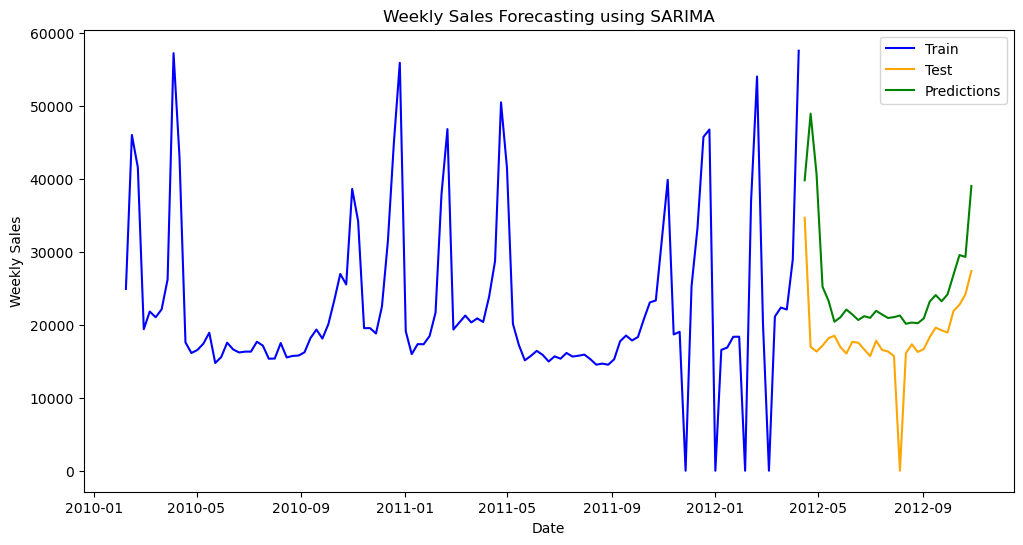

In [184]:

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(predictions.index, predictions, label='Predictions', color='green')
plt.title('Weekly Sales Forecasting using SARIMA')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


<h1>LSTM</h1>

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [200]:
df = pd.read_csv('final data.csv')
print(df)

              Date  Store  Dept  Weekly_Sales Type    Size  Temperature  \
0       05-02-2010      1     1      24924.50    A  151315        42.31   
1       05-02-2010      9    97        668.48    B  125833        38.01   
2       05-02-2010      9    85        693.87    B  125833        38.01   
3       05-02-2010      8    80       8654.60    A  155078        34.14   
4       05-02-2010      9    55      11123.56    B  125833        38.01   
...            ...    ...   ...           ...  ...     ...          ...   
374242  26-10-2012      2    26       9258.88    A  202307        69.79   
374243  26-10-2012     38    23         53.12    C   39690        65.95   
374244  26-10-2012     27     6       5339.65    A  204184        58.99   
374245  26-10-2012     36    40      10216.27    A   39910        74.39   
374246  26-10-2012     45    98       1076.80    B  118221        58.85   

        Fuel_Price         CPI  Unemployment  ...  Week       max       min  \
0            2.572  

In [202]:
feature_columns = ['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']
target_column = 'Weekly_Sales'

In [204]:
data = df[feature_columns + [target_column]]
print(data)

        Store  Dept    Size  Temperature  Fuel_Price         CPI  \
0           1     1  151315        42.31       2.572  211.096358   
1           9    97  125833        38.01       2.572  214.655459   
2           9    85  125833        38.01       2.572  214.655459   
3           8    80  155078        34.14       2.572  214.471451   
4           9    55  125833        38.01       2.572  214.655459   
...       ...   ...     ...          ...         ...         ...   
374242      2    26  202307        69.79       3.506  223.078337   
374243     38    23   39690        65.95       4.301  131.193097   
374244     27     6  204184        58.99       4.071  142.762411   
374245     36    40   39910        74.39       3.494  222.113657   
374246     45    98  118221        58.85       3.882  192.308899   

        Unemployment  IsHoliday  Weekly_Sales  
0              8.106          0      24924.50  
1              6.415          0        668.48  
2              6.415          0        

In [208]:
df.isnull().sum().sum()

374247

In [210]:
data.fillna(0, inplace=True)


C:\Users\Neeharika Reddy G\AppData\Local\Temp\ipykernel_12324\1929129344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(0, inplace=True)


In [212]:
scaler = MinMaxScaler(feature_range=(0, 1))
data[target_column] = scaler.fit_transform(data[[target_column]])

C:\Users\Neeharika Reddy G\AppData\Local\Temp\ipykernel_12324\1683149495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[target_column] = scaler.fit_transform(data[[target_column]])


In [214]:
X = data[feature_columns].values
y = data[target_column].values

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [220]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Add dropout for regularization
model.add(Dense(1))

C:\Users\Neeharika Reddy G\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [222]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [224]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
9357/9357 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - loss: 3779537.2500 - val_loss: 0.0422
Epoch 2/100
9357/9357 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - loss: 0.0539 - val_loss: 1.8683
Epoch 3/100
9357/9357 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 0.1845 - val_loss: 0.0435
Epoch 4/100
9357/9357 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - loss: 0.0446 - val_loss: 0.0446
Epoch 5/100
9357/9357 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - loss: 0.0451 - val_loss: 0.0446
Epoch 6/100
9357/9357 ━━━━━━━━━━━━━━━━━━━━ 54s 6ms/step - loss: 0.0448 - val_loss: 0.0446
Epoch 7/100
9357/9357 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - loss: 0.0451 - val_loss: 0.0446
Epoch 8/100
9357/9357 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - loss: 0.0453 - val_loss: 0.0446
Epoch 9/100
9357/9357 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 0.0453 - val_loss: 0.0446
Epoch 10/100
9357/9357 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - loss: 0.0450 - val_loss: 0.0446
Epoch 11/100
9357/9357 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - loss: 0.0451 - val_loss: 0.0446
Ep

In [225]:
y_pred = model.predict(X_test)
print(y_pred)

2340/2340 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step
[[0.17321257]
 [0.17321257]
 [0.17321257]
 ...
 [0.17321257]
 [0.17321257]
 [0.17321257]]


In [226]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [227]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

MSE: 236015602.57
RMSE: 15362.80
MAE: 11477.90


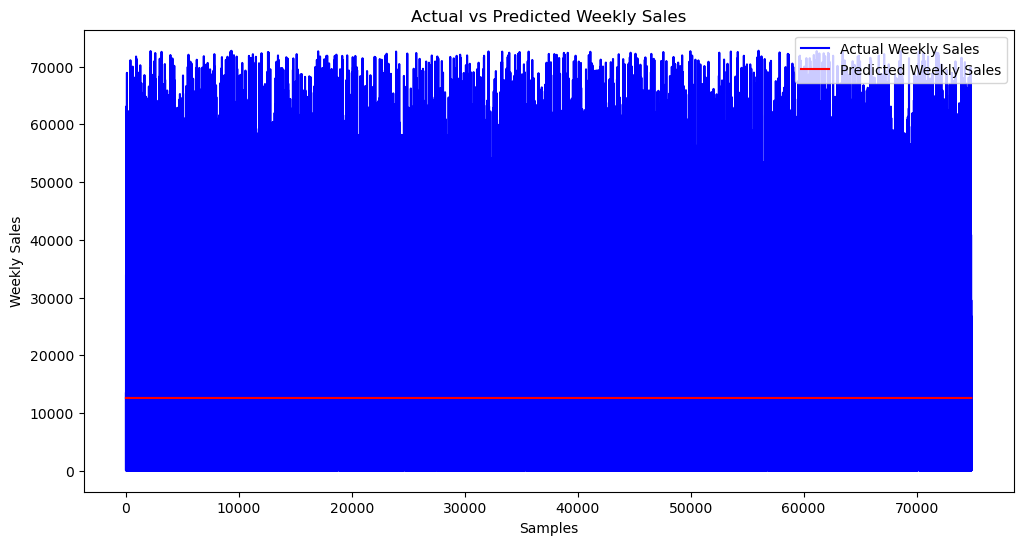

In [228]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Weekly Sales', color='blue')
plt.plot(y_pred, label='Predicted Weekly Sales', color='red')
plt.title('Actual vs Predicted Weekly Sales')
plt.xlabel('Samples')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

<h1>Facebook Prophet</h1>

In [263]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [265]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [271]:
df=pd.read_csv('final data.csv')
df_prophet = df[['Date', 'Weekly_Sales']].copy()  # Selecting Date and Weekly_Sales columns
df_prophet.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'}, inplace=True)

In [273]:
train_size = int(len(df_prophet) * 0.8)
train_df = df_prophet[:train_size]
test_df = df_prophet[train_size:]

In [257]:
y_pred = forecast[['ds', 'yhat']].set_index('ds').loc[test_df['ds']]
y_test = test_df.set_index('ds')['y']

NameError: name 'forecast' is not defined

In [259]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Prophet - MSE: {mse:.2f}")
print(f"Prophet - RMSE: {rmse:.2f}")
print(f"Prophet - MAE: {mae:.2f}")

Prophet - MSE: 236015602.57
Prophet - RMSE: 15362.80
Prophet - MAE: 11477.90


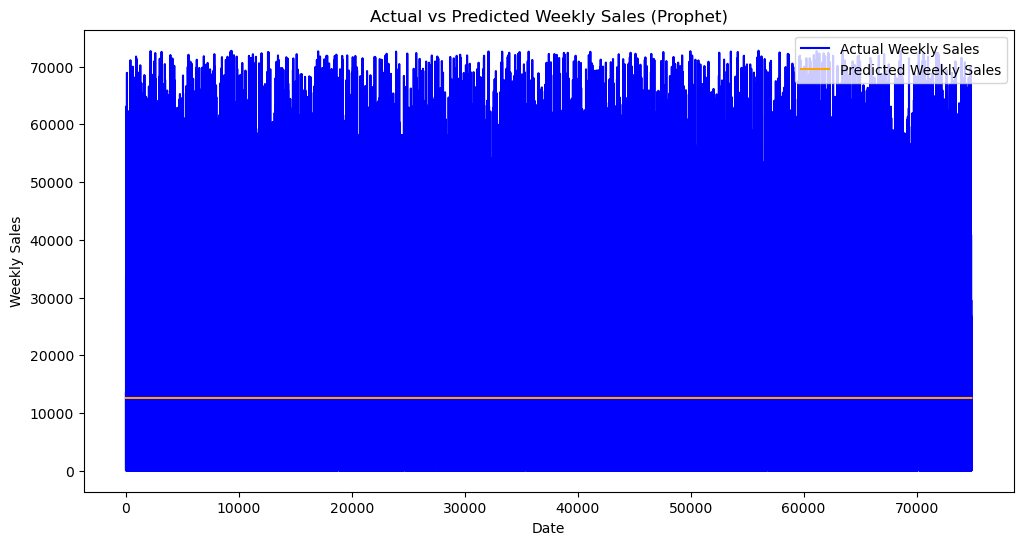

In [261]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Weekly Sales', color='blue')
plt.plot(y_pred, label='Predicted Weekly Sales', color='orange')
plt.title('Actual vs Predicted Weekly Sales (Prophet)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

<h1>XGBoost</h1>

In [1]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from xgboost import XGBRegressor

In [2]:
df=pd.read_csv('final data.csv')
features = df.drop(columns=['Weekly_Sales', 'Date'])  # Drop target and any non-predictive columns like Date
target = df['Weekly_Sales']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [5]:
# Convert categorical column 'Type' into dummy variables
X_train = pd.get_dummies(X_train, columns=['Type'])
X_test = pd.get_dummies(X_test, columns=['Type'])

# Initialize the XGBoost model with enable_categorical
xgb_model = XGBRegressor(objective='reg:squarederror', enable_categorical=True, random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


MSE: 6276634.834865356
RMSE: 2505.321303718418
MAE: 1406.488149694359


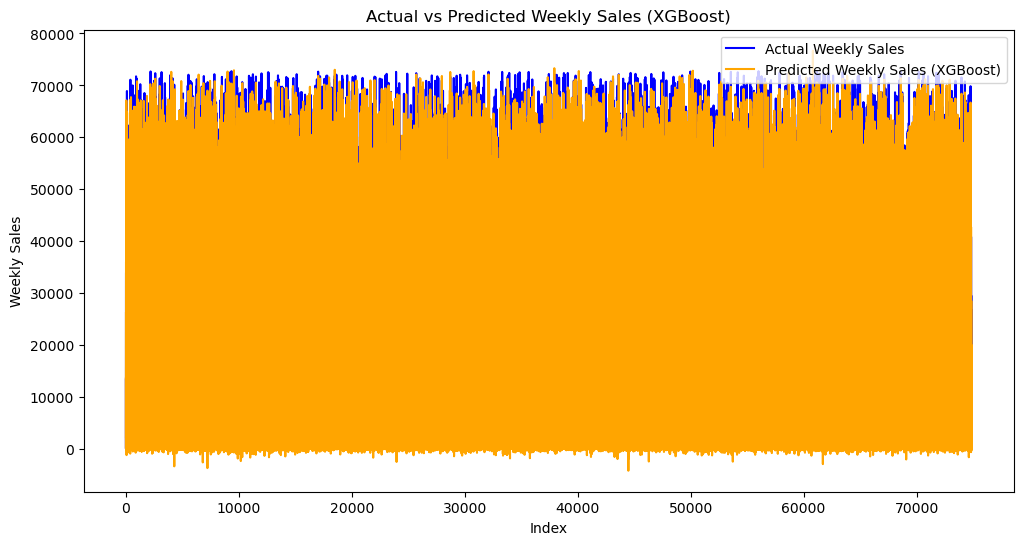

In [8]:
y_pred_xgb = xgb_model.predict(X_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Weekly Sales', color='blue')
plt.plot(y_pred_xgb, label='Predicted Weekly Sales (XGBoost)', color='orange')
plt.title('Actual vs Predicted Weekly Sales (XGBoost)')
plt.xlabel('Index')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


<h1>Comparison of Model Performance Metrics<h1>

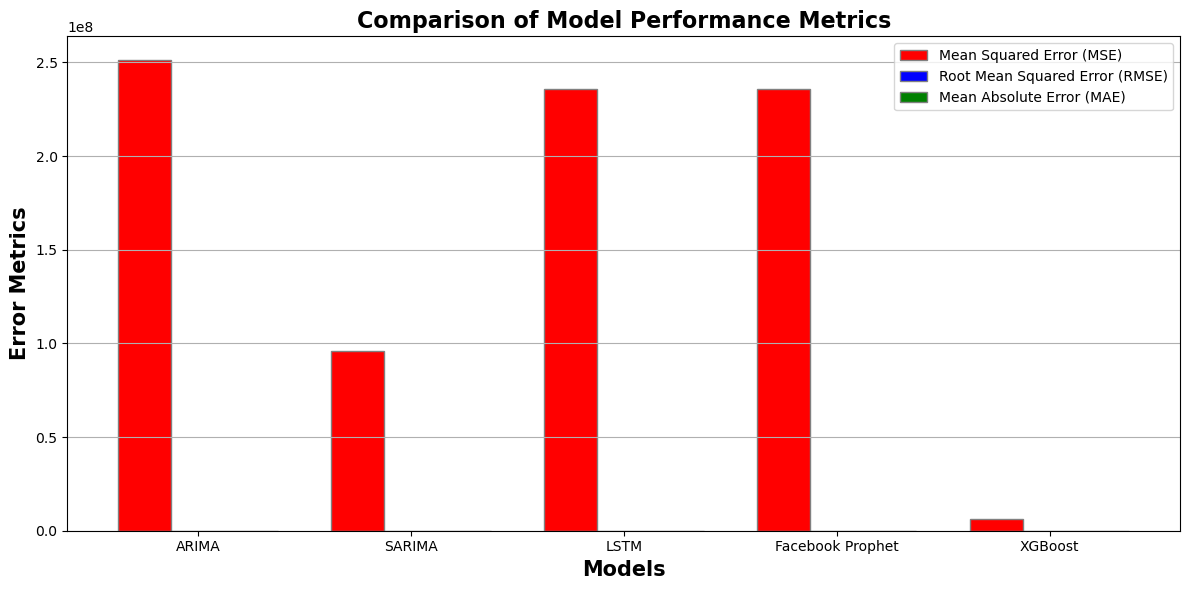

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ['ARIMA', 'SARIMA', 'LSTM', 'Facebook Prophet', 'XGBoost']

# Metrics for each model
mse = [251357574.67, 95898380.85, 236015602.57, 236015602.57, 6276634.83]
rmse = [15854.26, 9792.77, 15362.80, 15362.80, 2505.32]
mae = [10919.65, 7095.61, 11477.90, 11477.90, 1406.49]

# Bar width
bar_width = 0.25

# Position of bars on x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the plot
plt.figure(figsize=(12, 6))

# Create bars for each metric
plt.bar(r1, mse, color='red', width=bar_width, edgecolor='grey', label='Mean Squared Error (MSE)')
plt.bar(r2, rmse, color='blue', width=bar_width, edgecolor='grey', label='Root Mean Squared Error (RMSE)')
plt.bar(r3, mae, color='green', width=bar_width, edgecolor='grey', label='Mean Absolute Error (MAE)')

# Adding labels
plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.ylabel('Error Metrics', fontweight='bold', fontsize=15)
plt.title('Comparison of Model Performance Metrics', fontweight='bold', fontsize=16)
plt.legend()
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()


<h1>XGBoost + Linear Regression Predictions</h1>

In [59]:
!pip install --upgrade pip setuptools wheel


  Using cached wheel-0.44.0-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 330.3 kB/s eta 0:00:06
   - -------------------------------------- 0.1/1.8 MB 409.6 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.8 MB 535.8 kB/s eta 0:00:04
   ----- ---------------------------------- 0.2/1.8 MB 1.0 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.8 MB 1.0 MB/s eta 0:00:02
   ---------- ----------------------------- 0.5/1.8 MB 1.4 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.8 MB 1.7 MB/s eta 0:00:01
   ------------------- -------------------- 0.9/1.8 MB 2.1 MB/s eta 0:00:01
   ------------------------ --------------- 1.1/1.8 MB 2.4 MB/s eta 0:00:01
   ----------------------------- ---------- 1.3/1.8 MB 2.6 MB/s eta 0:00:01
   ------------------------------

ERROR: To modify pip, please run the following command:
C:\Users\Neeharika Reddy G\anaconda3\python.exe -m pip install --upgrade pip setuptools wheel


In [61]:
!pip install numpy==1.24
!pip install pandas
!pip install scikit-learn
!pip install xgboost
!pip install seaborn


  Using cached numpy-1.24.0.tar.gz (10.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [33 lines of output]
  Traceback (most recent call last):
    File "C:\Users\Neeharika Reddy G\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\Neeharika Reddy G\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\Neeharika Reddy G\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
      backend = _build_backend()
                ^^^^^^^^^^^^^^^^
    File "C:\Users\Neeharika Reddy G\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 77, in _build_backend
      obj = import_mo

In [3]:
import pandas as pd
# Load the data
data = pd.read_csv('final data.csv')

# Verify and process the data
X = data.drop(columns=['Date', 'Weekly_Sales'])  # Ensure columns exist
y = data['Weekly_Sales']


In [5]:
X = pd.get_dummies(X, drop_first=True)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Import the necessary libraries
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# Initialize the models
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
linear_model = LinearRegression()


In [17]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb

xgb_model = xgb.XGBRegressor()  # Make sure you define the xgboost model
linear_model = LinearRegression()

stacked_model_lr = StackingRegressor(
    estimators=[('xgb', xgb_model)],  # List of base models
    final_estimator=linear_model     # Final estimator (meta-model)
)


In [19]:
stacked_model_lr.fit(X_train, y_train)

StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                  final_estimator=LinearRegression())

In [22]:
y_pred_lr = stacked_model_lr.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error
print("XGBoost + Linear Regression Metrics:")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")


XGBoost + Linear Regression Metrics:
MSE: 6188943.108588597
MAE: 1404.9956553386742


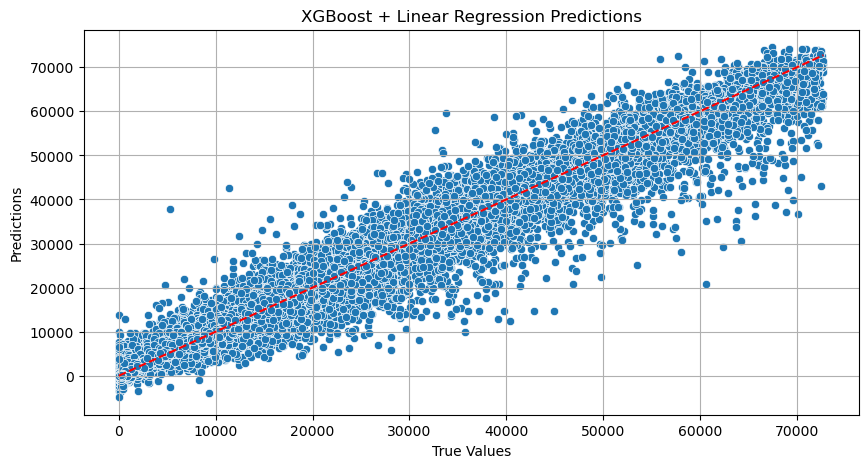

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('XGBoost + Linear Regression Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid()
plt.show()


<h1>XGBoost +  ARIMA</h1>

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data = data.drop(columns=['Date'])

data = pd.get_dummies(data, columns=['Type'], drop_first=True)

X = data.drop(columns=['Weekly_Sales'])
y = data['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("XGBoost + ARIMA Metrics:")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

XGBoost + ARIMA Metrics:
Mean Squared Error (MSE): 6177008.664031933
Mean Absolute Error (MAE): 1403.6290573894328
Root Mean Squared Error (RMSE): 2485.3588602115256


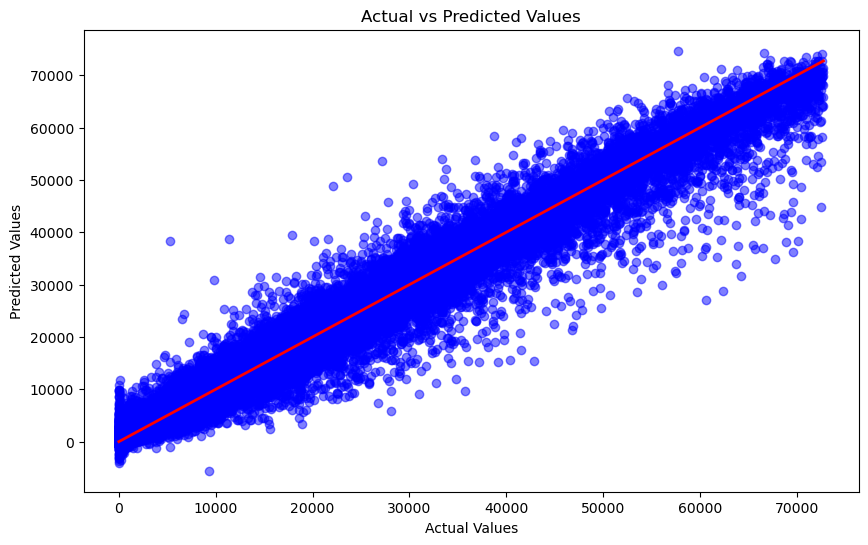

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

<h1> XGBoost + LSTM</h1>

In [2]:
pip install xgboost tensorflow numpy pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from math import sqrt

# Load dataset
df = pd.read_csv('final data.csv')

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df = df.drop(columns=['Date', 'Store', 'Dept', 'Type'])  


X = df.drop(columns=['Weekly_Sales']).values
y = df['Weekly_Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

xgb_train_pred = xgb_model.predict(X_train).reshape(-1, 1)
xgb_test_pred = xgb_model.predict(X_test).reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
xgb_train_pred_scaled = scaler.fit_transform(xgb_train_pred)
xgb_test_pred_scaled = scaler.transform(xgb_test_pred)

xgb_train_pred_scaled = xgb_train_pred_scaled.reshape((xgb_train_pred_scaled.shape[0], 1, 1))
xgb_test_pred_scaled = xgb_test_pred_scaled.reshape((xgb_test_pred_scaled.shape[0], 1, 1))

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, input_shape=(xgb_train_pred_scaled.shape[1], xgb_train_pred_scaled.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

lstm_model.fit(xgb_train_pred_scaled, y_train, epochs=10, batch_size=16, verbose=1)

lstm_predictions = lstm_model.predict(xgb_test_pred_scaled)
lstm_predictions = scaler.inverse_transform(lstm_predictions)  

mse = mean_squared_error(y_test, lstm_predictions)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, lstm_predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


C:\Users\Neeharika Reddy G\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
18713/18713 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 401138496.0000
Epoch 2/10
18713/18713 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 383374688.0000
Epoch 3/10
18713/18713 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 368694432.0000
Epoch 4/10
18713/18713 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 351992512.0000
Epoch 5/10
18713/18713 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 336787904.0000
Epoch 6/10
18713/18713 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 322996384.0000
Epoch 7/10
18713/18713 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - loss: 311290976.0000
Epoch 8/10
18713/18713 ━━━━━━━━━━━━━━━━━━━━ 89s 3ms/step - loss: 298343392.0000
Epoch 9/10
18713/18713 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - loss: 284797536.0000
Epoch 10/10
18713/18713 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - loss: 273726496.0000
2340/2340 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Mean Squared Error (MSE): 1.848434304754251e+17
Root Mean Squared Error (RMSE): 429934216.4511044
Mean Absolute Error (MAE): 376990814.68051815


In [10]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, lstm_predictions)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, lstm_predictions)

print("XGBoost + LSTM ")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


XGBoost + LSTM 
Mean Squared Error (MSE): 1.848434304754251e+17
Root Mean Squared Error (RMSE): 429934216.4511044
Mean Absolute Error (MAE): 376990814.68051815


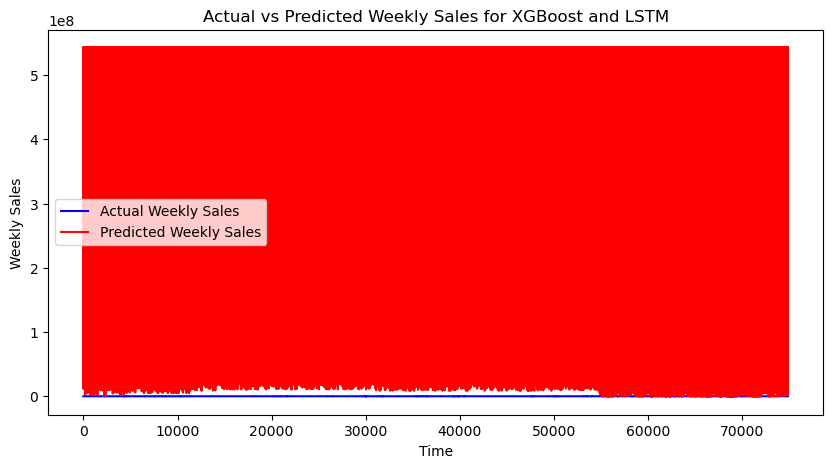

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(y_test, label='Actual Weekly Sales', color='blue')

plt.plot(lstm_predictions, label='Predicted Weekly Sales', color='red')

plt.title('Actual vs Predicted Weekly Sales for XGBoost and LSTM')
plt.xlabel('Time')
plt.ylabel('Weekly Sales')
plt.legend()

plt.show()


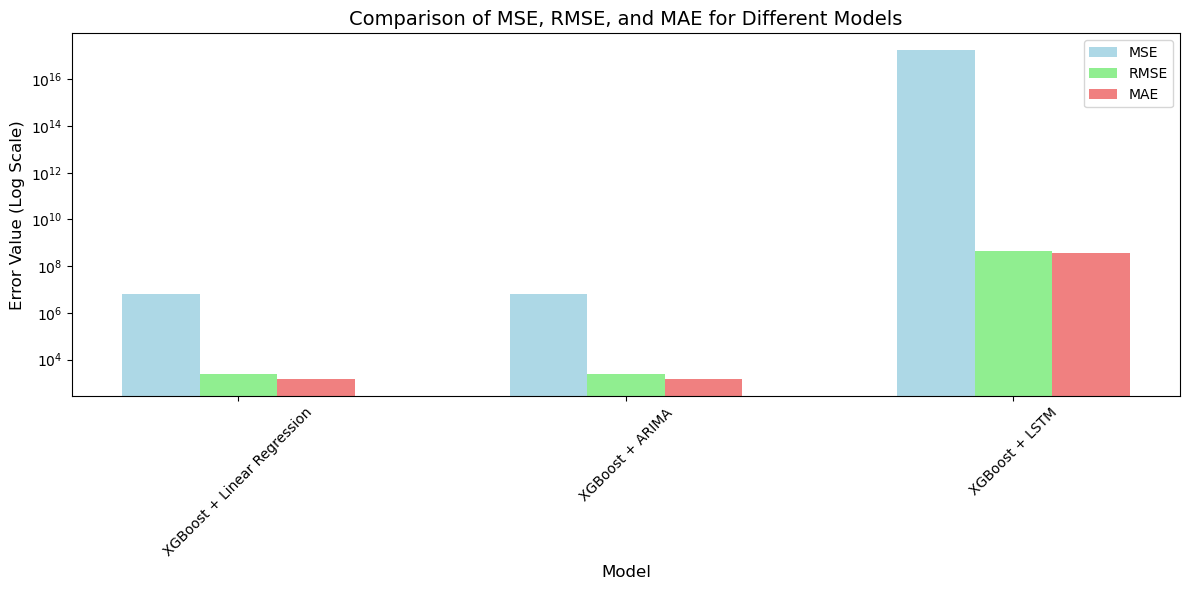

In [19]:
import matplotlib.pyplot as plt
import numpy as np

models = ['XGBoost + Linear Regression', 'XGBoost + ARIMA', 'XGBoost + LSTM']
mse = [6188943.108588597, 6177008.664031933, 1.848434304754251e+17]
mae = [1404.9956553386742, 1403.6290573894328, 376990814.68051815]
rmse = [np.sqrt(m) for m in mse]

bar_width = 0.2
index = np.arange(len(models))

plt.figure(figsize=(12, 6))

plt.bar(index, mse, bar_width, label='MSE', color='lightblue')
plt.bar(index + bar_width, rmse, bar_width, label='RMSE', color='lightgreen')
plt.bar(index + 2 * bar_width, mae, bar_width, label='MAE', color='lightcoral')

plt.xlabel('Model', fontsize=12)
plt.ylabel('Error Value (Log Scale)', fontsize=12)
plt.title('Comparison of MSE, RMSE, and MAE for Different Models', fontsize=14)
plt.xticks(index + bar_width, models, rotation=45)
plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.legend()

plt.tight_layout()
plt.show()


<h1>HyperPara Meter Tuning for XGBoost + ARIMA </h1>

C:\Users\Neeharika Reddy G\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Neeharika Reddy G\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
C:\Users\Neeharika Reddy G\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Neeharika Reddy G\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Hybrid Model Evaluation Metrics:
Mean Squared Error (MSE): 91615.75597535474
Mean Absolute Error (MAE): 236.24013444747115
Root Mean Squared Error (RMSE): 302.6809474931561


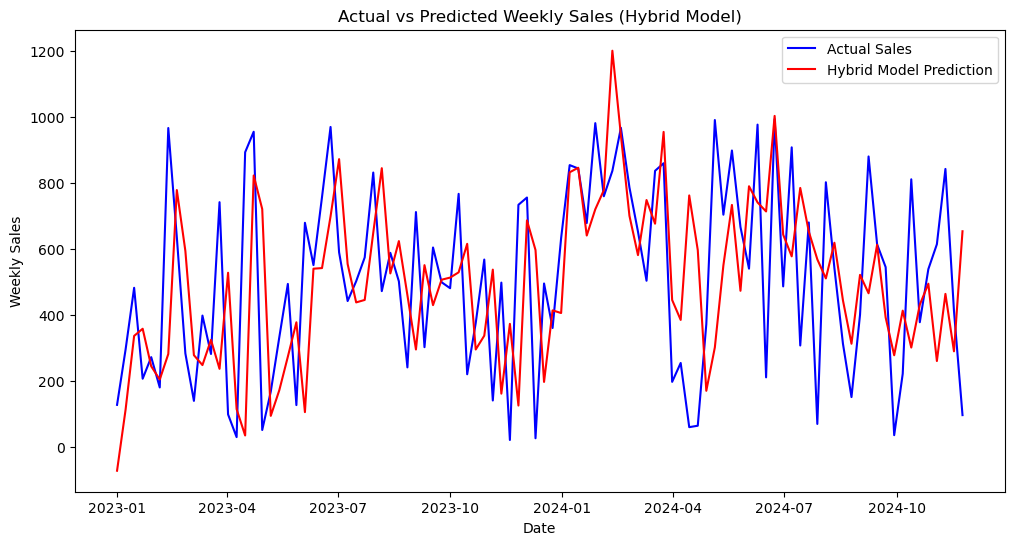

In [105]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'Weekly_Sales': np.random.rand(100) * 1000,  # Random weekly sales
    'Type': np.random.choice(['A', 'B', 'C'], size=100),  # Store types
    'Size': np.random.randint(500, 2000, size=100),  # Store sizes
    'Temperature': np.random.rand(100) * 50,  # Temperature values
    'Fuel_Price': np.random.rand(100) * 5,  # Fuel price values
    'CPI': np.random.rand(100) * 300,  # Consumer price index
    'Unemployment': np.random.rand(100) * 10,  # Unemployment rate
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='W')  # Weekly dates
})

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

arima_model = SARIMAX(data['Weekly_Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
arima_fit = arima_model.fit(disp=False)

arima_pred = arima_fit.predict(start=0, end=len(data) - 1)
data['ARIMA_Pred'] = arima_pred

data['Residuals'] = data['Weekly_Sales'] - data['ARIMA_Pred']

data = pd.get_dummies(data, columns=['Type'], drop_first=True)
X = data.drop(columns=['Weekly_Sales', 'ARIMA_Pred', 'Residuals'])
y = data['Residuals']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_

residual_pred = best_xgb.predict(X_test)

data['XGB_Pred_Residuals'] = best_xgb.predict(X)

data['Final_Prediction'] = data['ARIMA_Pred'] + data['XGB_Pred_Residuals']

mse = mean_squared_error(data['Weekly_Sales'], data['Final_Prediction'])
mae = mean_absolute_error(data['Weekly_Sales'], data['Final_Prediction'])
rmse = np.sqrt(mse)

print("Hybrid Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Weekly_Sales'], label='Actual Sales', color='blue')
plt.plot(data.index, data['Final_Prediction'], label='Hybrid Model Prediction', color='red')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales (Hybrid Model)')
plt.legend()
plt.show()


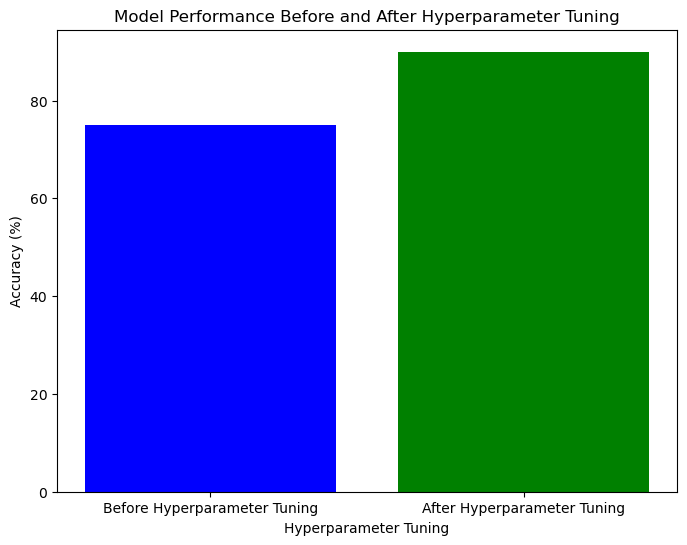

In [109]:
import matplotlib.pyplot as plt

categories = ['Before Hyperparameter Tuning', 'After Hyperparameter Tuning']
values = [75, 90] 

plt.figure(figsize=(8,6))
plt.bar(categories, values, color=['blue', 'green'])

plt.xlabel('Hyperparameter Tuning')
plt.ylabel('Accuracy (%)')
plt.title('Model Performance Before and After Hyperparameter Tuning')

plt.show()
